# Pyber
- The average fare is the greatest in rural cities, but also represents the smallest percentage of total fare, number of rides and number of drivers. If fare rate were lower in rural areas, would ride count increase?
- Increased ride count is positively correlated with increased driver count.
- Pyber employs three times as many drivers in urban cities than in suburban and rural cities combined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
city = pd.read_csv("resources/city_data.csv")
ride = pd.read_csv("resources/ride_data.csv")

In [3]:
city.head(3)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban


In [4]:
# remove the bad data record
city=city.drop(city.index[100])
city[city["city"]=="Port James"]

,city,driver_count,type
84,Port James,15,Suburban


In [5]:
ride.head(3)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587


In [6]:
# calculate average fare per city
avgFare = ride.groupby("city")["fare"].mean().to_frame("AvgFare")
avgFare["AvgFare"].nlargest(5)

city
Manuelchester    49.620000
Matthewside      43.532500
East Stephen     39.053000
South Joseph     38.983333
North Whitney    38.146000
Name: AvgFare, dtype: float64

In [7]:
cityRide = city.merge(ride)
avgFareByType = cityRide.groupby("type")["fare"].mean()
avgFareByType

type
Rural       34.040720
Suburban    30.908608
Urban       24.663594
Name: fare, dtype: float64

In [8]:
# calculate total ride per city
rideCount = ride.groupby("city")["ride_id"].count().to_frame("rideCount")
rideCount["rideCount"].nlargest(5)

city
Port Johnstad    34
Swansonbury      34
Port James       32
South Louis      32
Alvarezhaven     31
Name: rideCount, dtype: int64

In [9]:
# combine the data for plotting
summary = city.merge(avgFare, left_on="city", right_index=True).merge(rideCount, left_on="city", right_index=True)
summary.head(3)

,city,driver_count,type,AvgFare,rideCount
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22


### Bubble Chart

In [10]:
#rename the column for aesthetics in legend
# summary.rename(columns={"type":"City Type"}, inplace=True)

# apply colors to the unique city types
categories = np.unique(summary["type"])
# colors = np.linspace(0, 1, len(categories)) #if number of colors unknown, can use this to do gray scale
colors = ['gold','lightskyblue','lightcoral']
colordict = dict(zip(categories, colors))  

summary["color"] = summary["type"].apply(lambda x: colordict[x])


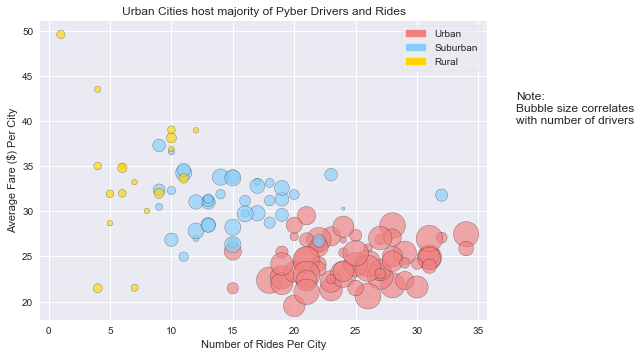

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(summary["rideCount"], summary["AvgFare"], s=summary["driver_count"]*10, c=summary["color"], alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()

plt.title("Urban Cities host majority of Pyber Drivers and Rides")
plt.xlabel("Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")

# manually make the legend
urbanPatch = mpatches.Patch(color=colors[2], label=categories[2])
subrurbanPatch = mpatches.Patch(color=colors[1], label=categories[1])
ruralPatch = mpatches.Patch(color=colors[0], label=categories[0])
plt.legend(handles=[urbanPatch, subrurbanPatch, ruralPatch], frameon=True, loc="upper right")
#add a note regarding the bubble size
plt.gcf().text(.95, 0.68, "Note:", fontsize=12, )
plt.gcf().text(.95, 0.65, "Bubble size correlates", fontsize=12)
plt.gcf().text(.95, 0.62, "with number of drivers", fontsize=12)
plt.show()

#### % of Total Fares by City Type

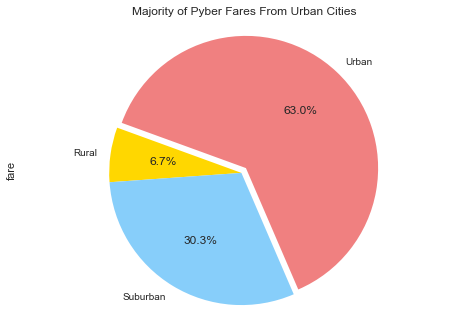

In [12]:
fareTotal = cityRide.groupby("type")["fare"].sum()
# display in a pie chart - autopct automatically calculates the percentage so we don't have to!
colors = ['gold','lightskyblue','lightcoral']
fareTotal.plot(kind="pie", autopct="%1.1f%%", startangle=160, colors=colors, explode=(0,0,.05))
plt.axis("equal")
plt.title("Majority of Pyber Fares From Urban Cities")
plt.show()


#### % of Total Rides by City Type

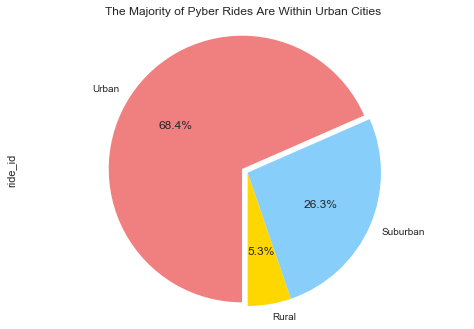

In [13]:
summary.head(3)
# rideTypeCount = summary["City Type"].value_counts().to_frame("rideCount")
rideTypeCount = cityRide.groupby("type")["ride_id"].count()
colors = ['gold','lightskyblue','lightcoral']
rideTypeCount.plot(kind="pie",autopct="%1.1f%%", startangle=270, colors=colors, explode=(0,0,0.05))
# plt.pie(rideTypeCount["rideCount"], labels=rideTypeCount.index, autopct="%1.1f%%", startangle=270, colors=colors, explode=(.05,0,0))
plt.axis("equal")
plt.title("The Majority of Pyber Rides Are Within Urban Cities ")
plt.show()

#### % of Total Drivers by City Type

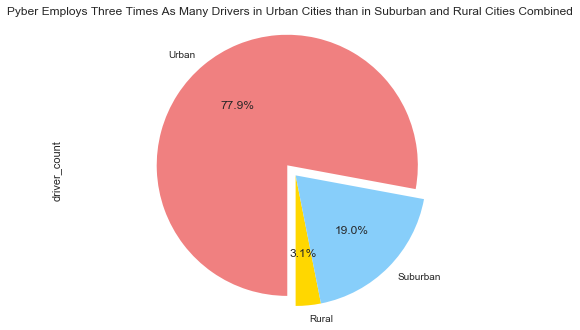

In [14]:
# driverCount = summary.groupby("City Type")["driver_count"].sum()
# driverCount
driverCount = city.groupby("type")["driver_count"].sum()
colors = ['gold','lightskyblue','lightcoral']
driverCount.plot(kind="pie", autopct="%1.1f%%", startangle=270, colors=colors, explode=(0,0,.1))
# plt.pie(driverCount, labels=driverCount.index, autopct="%1.1f%%", startangle=270, colors=colors, explode=(0,0,.1))
plt.axis("equal")
plt.title("Pyber Employs Three Times As Many Drivers in Urban Cities than in Suburban and Rural Cities Combined")
plt.show()